<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

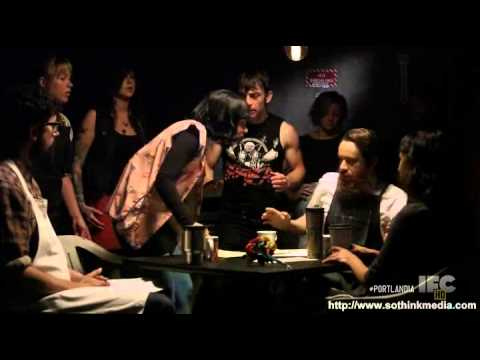

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\dougcohen\\Repos\\Unit-4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
shops['star_rating'] = shops['star_rating'].str[0:4]

shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [5]:
# import statements

# BASE
from collections import Counter
import re

# PLOTTING 
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP LIBRARIES
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

In [6]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [7]:
tokenizer = Tokenizer(nlp.vocab)

In [8]:
# Tokenizer Pipeline

tokens = []

'''Add tokens without stopwords'''
for doc in tokenizer.pipe(shops['full_review_text']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [9]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,"[ , 11/25/2016, 1, check-in, love, love, loved..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"[ , 12/2/2016, listed, date, night:, austin,, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,"[ , 11/30/2016, 1, check-in, listed, brunch, s..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,"[ , 11/25/2016, cool, decor!, good, drinks, ni..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,"[ , 12/3/2016, 1, check-in, located, northcros..."


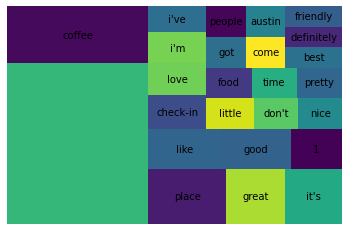

In [11]:
# Visualize the counts of tokens

wc = count(shops['tokens'])

wc_top25 = wc[wc['rank'] <= 25]

squarify.plot(sizes=wc_top25['pct_total'], label=wc_top25['word'])
plt.axis('off')
plt.show()

In [12]:
# add stop words to the default list

STOP_WORDS = nlp.Defaults.stop_words.union([' ', "i'm", 'check-in', '1'])

In [13]:
# Tokenizer Pipeline

tokens = []

'''Add tokens without stopwords'''
for doc in tokenizer.pipe(shops['full_review_text']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

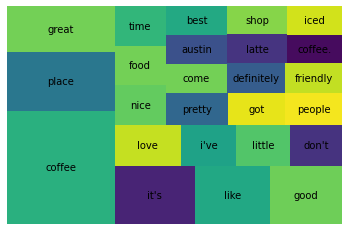

In [14]:
# Visualize the counts of tokens, but now with additional stop words

wc = count(shops['tokens'])

wc_top25 = wc[wc['rank'] <= 25]

squarify.plot(sizes=wc_top25['pct_total'], label=wc_top25['word'])
plt.axis('off')
plt.show()

In [15]:
# Lemmatization function

def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [16]:
# apply the get_lemmas function to the review column and make it a new column

shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [17]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,"[11/25/2016, love, love, loved, atmosphere!, c...","[11/25/2016, check, Love, love, love, atmosphe..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, list, Date, Night, Austin, Ambianc..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,"[11/30/2016, listed, brunch, spots, loved, ecl...","[11/30/2016, check, list, Brunch, Spots, love,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor, good, drink, nice, s..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,"[12/3/2016, located, northcross, mall, shoppin...","[12/3/2016, check, locate, Northcross, mall, s..."


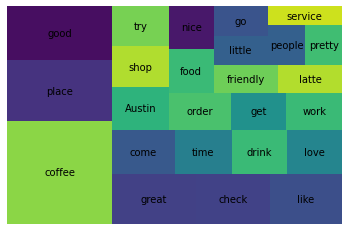

In [18]:
# Visualize the counts of tokens, after being lemmatized

wc = count(shops['lemmas'])

wc_top25 = wc[wc['rank'] <= 25]

squarify.plot(sizes=wc_top25['pct_total'], label=wc_top25['word'])
plt.axis('off')
plt.show()

In [19]:
# see the datatypes of the columns

shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
tokens              object
lemmas              object
dtype: object

In [20]:
# change datatype from object to float

shops['star_rating'] = shops['star_rating'].astype(float)

In [21]:
shops.dtypes

coffee_shop_name     object
full_review_text     object
star_rating         float64
tokens               object
lemmas               object
dtype: object

In [22]:
# Subset reviews into good reviews and bad reviews

good_ratings_subset = shops[shops['star_rating'] >= 4.0]

good_ratings_subset.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,"[11/25/2016, love, love, loved, atmosphere!, c...","[11/25/2016, check, Love, love, love, atmosphe..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, list, Date, Night, Austin, Ambianc..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,"[11/30/2016, listed, brunch, spots, loved, ecl...","[11/30/2016, check, list, Brunch, Spots, love,..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,"[12/3/2016, located, northcross, mall, shoppin...","[12/3/2016, check, locate, Northcross, mall, s..."
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0,"[11/20/2016, cute, cafe!, think, moment, stepp...","[11/20/2016, check, cute, cafe, think, moment,..."


In [23]:
bad_ratings_subset = shops[shops['star_rating'] < 4.0]

bad_ratings_subset.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor, good, drink, nice, s..."
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0,"[10/25/2016, ok,, let's, try, approach..., pro...","[10/25/2016, check, ok, let, try, approach, pr..."
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0,"[11/20/2016, store, a+, decoration,, honestly,...","[11/20/2016, store, a+, decoration, honestly, ..."
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0,"[11/17/2016, listed, 2016, time, charm!, facto...","[11/17/2016, check, list, 2016, time, Charm, F..."
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0,"[12/2/2016, okay,, visiting, friends, la, tryi...","[12/2/2016, okay, visit, friend, LA, try, mint..."


In [24]:
# apply lemmatization on new subsets

good_ratings_subset['lemmas'] = good_ratings_subset['full_review_text'].apply(get_lemmas)
bad_ratings_subset['lemmas'] = bad_ratings_subset['full_review_text'].apply(get_lemmas)

C:\Users\dougcohen\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dougcohen\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


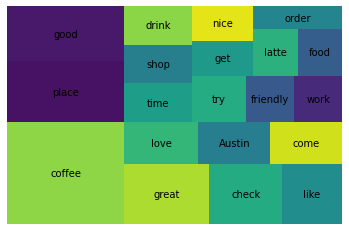

In [25]:
# visualize the popular words between the 2 subsets

wc_good = count(good_ratings_subset['lemmas'])

wc_good_top25 = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_good_top25['pct_total'], label=wc_good_top25['word'])
plt.axis('off')
plt.show()

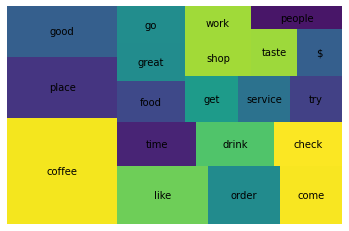

In [26]:
wc_bad = count(bad_ratings_subset['lemmas'])

wc_bad_top25 = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_bad_top25['pct_total'], label=wc_bad_top25['word'])
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [43]:
wc_good[['word', 'count']].head(10)

,word,count
14,coffee,8008
77,place,4801
183,good,4341
89,great,3449
24,check,2942
182,like,2434
21,love,2053
42,Austin,1988
381,come,1988
398,time,1771


In [41]:
wc_bad[['word', 'count']].head(10)

,word,count
17,coffee,2099
11,place,1225
4,good,1000
2,like,945
52,order,759
44,come,650
231,time,613
35,drink,610
123,check,526
63,food,497


In [40]:
(wc_good['count'].values[0]) - wc_bad['count'].values[0]

5909

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

